<a href="https://colab.research.google.com/github/21BDS0312/EDA_DA/blob/main/21BDS0312_EDA_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA DA

Deepansh Chaturvedi
21BDS0312

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
dataset_url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/lithium-ion%20batteries.csv"
df = pd.read_csv(dataset_url)

In [4]:
# Display first few rows
display(df.head())

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic


In [5]:
#Dataset Dimensions
print("Dataset Shape:", df.shape)

Dataset Shape: (339, 11)


In [6]:
# Summary Statistics
print(df.describe())

       Formation Energy (eV)  Band Gap (eV)      Nsites  Density (gm/cc)  \
count             339.000000     338.000000  339.000000       339.000000   
mean               -2.616950       2.082169   38.837758         2.984003   
std                 0.183809       1.088661   23.133142         0.353968   
min                -2.985000       0.000000   10.000000         2.200000   
25%                -2.757500       1.266250   26.000000         2.760500   
50%                -2.605000       2.505500   31.000000         2.947000   
75%                -2.525500       2.968500   52.000000         3.106000   
max                -2.012000       3.823000  132.000000         4.201000   

            Volume  
count   339.000000  
mean    467.765619  
std     292.674559  
min     122.581000  
25%     286.381500  
50%     358.537000  
75%     601.696500  
max    1518.850000  


In [7]:
# Checking Data Types and Missing Values
print(df.info())
print("Missing Values:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Materials Id           339 non-null    object 
 1   Formula                338 non-null    object 
 2   Spacegroup             339 non-null    object 
 3   Formation Energy (eV)  339 non-null    float64
 4   E Above Hull (eV)      339 non-null    object 
 5   Band Gap (eV)          338 non-null    float64
 6   Nsites                 339 non-null    int64  
 7   Density (gm/cc)        339 non-null    float64
 8   Volume                 339 non-null    float64
 9   Has Bandstructure      339 non-null    bool   
 10  Crystal System         338 non-null    object 
dtypes: bool(1), float64(4), int64(1), object(5)
memory usage: 26.9+ KB
None
Missing Values:
Materials Id             0
Formula                  1
Spacegroup               0
Formation Energy (eV)    0
E Above Hull (eV) 

In [8]:
# Handling Missing Values
# Fill numeric missing values with median, categorical with mode
df.fillna(df.median(numeric_only=True), inplace=True)
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

In [9]:
# Verify missing values after handling
print("Missing Values after handling:")
print(df.isnull().sum())

Missing Values after handling:
Materials Id             0
Formula                  0
Spacegroup               0
Formation Energy (eV)    0
E Above Hull (eV)        0
Band Gap (eV)            0
Nsites                   0
Density (gm/cc)          0
Volume                   0
Has Bandstructure        0
Crystal System           0
dtype: int64


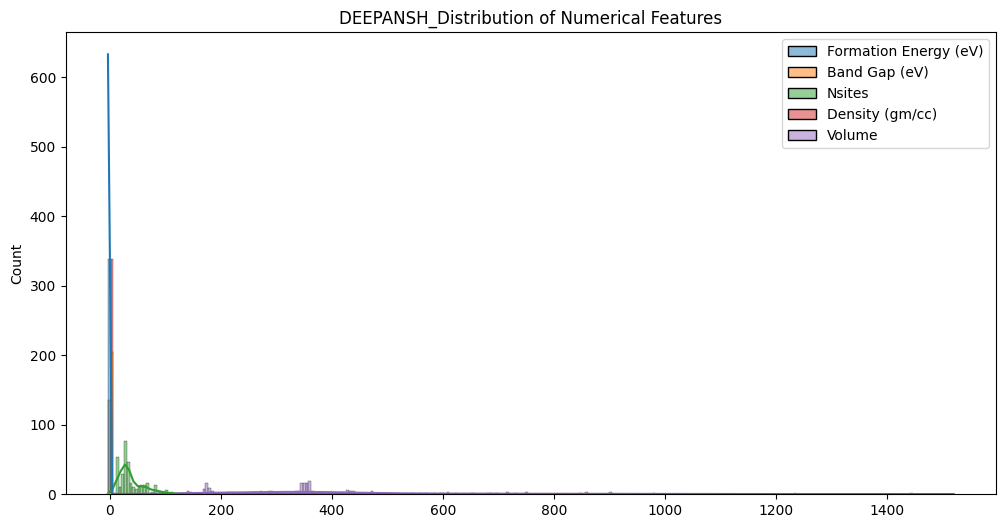

In [24]:
# Univariate Analysis
plt.figure(figsize=(12, 6))
sns.histplot(df.select_dtypes(include=[np.number]), bins=312, kde=True)
plt.title("DEEPANSH_Distribution of Numerical Features")
plt.show()

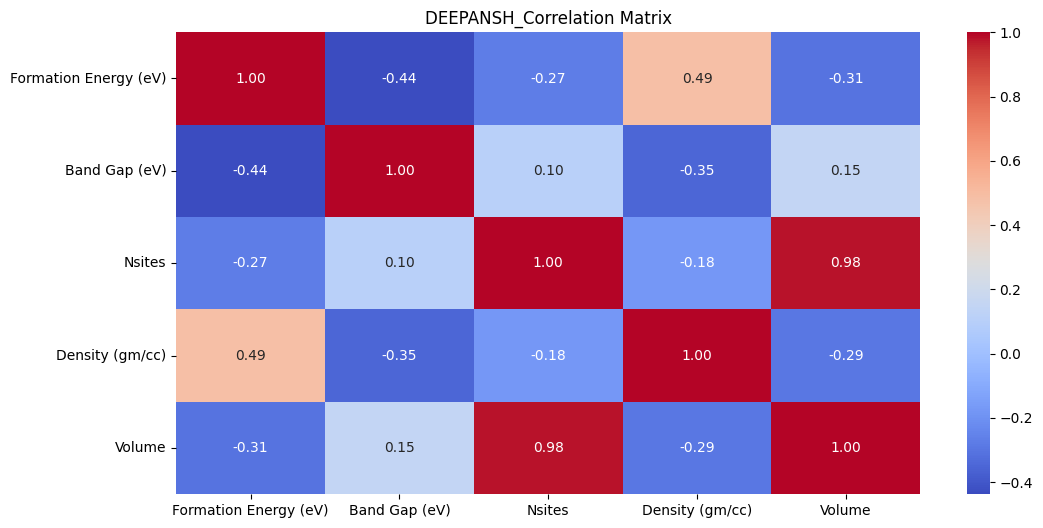

In [25]:
# Bivariate Analysis
plt.figure(figsize=(12, 6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("DEEPANSH_Correlation Matrix")
plt.show()

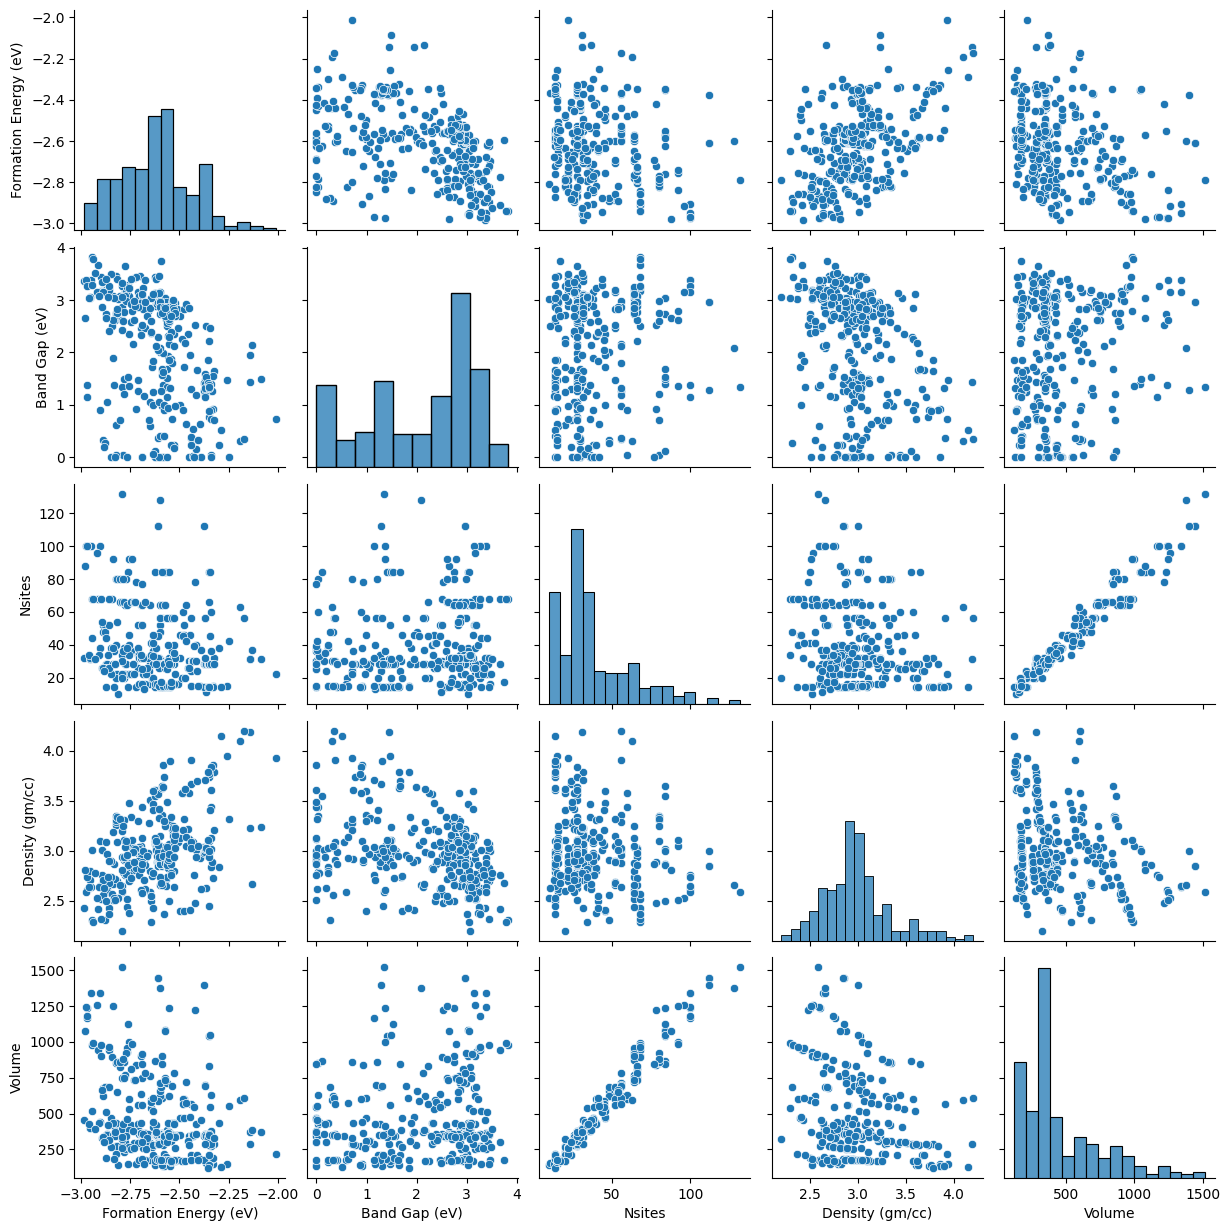

In [13]:
# Pairplot
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.show()

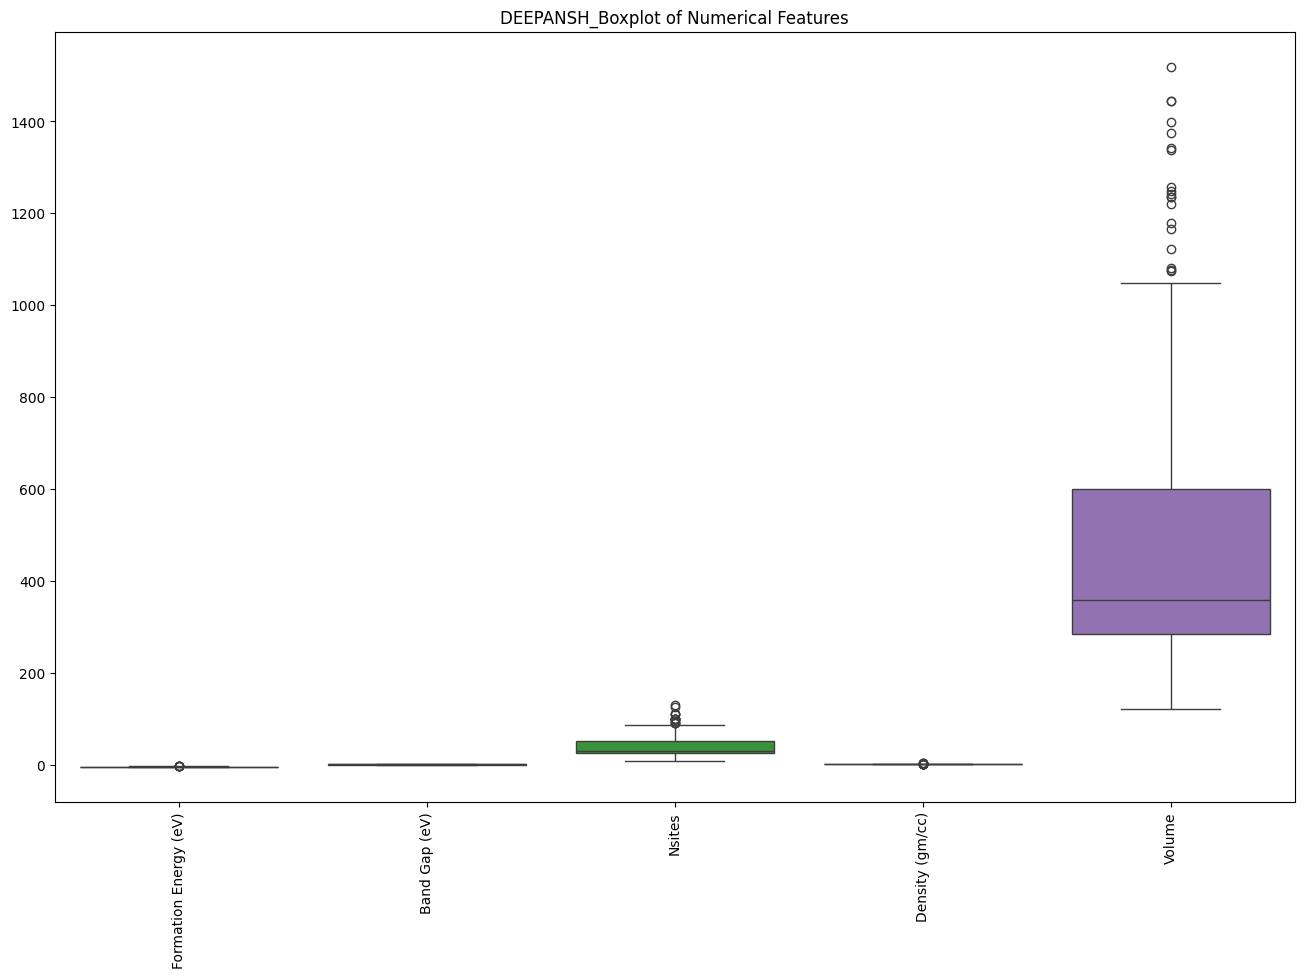

In [26]:
# Boxplot for Outliers
plt.figure(figsize=(16, 10))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.xticks(rotation=90)
plt.title("DEEPANSH_Boxplot of Numerical Features")
plt.show()

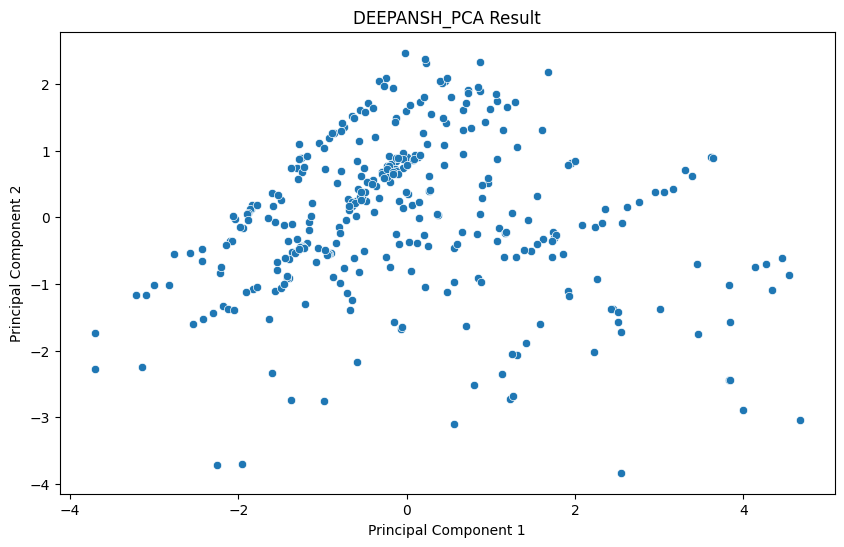

In [27]:
# Multivariate Analysis (PCA - Principal Component Analysis)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scalerDeepansh = StandardScaler()
df_scaled = scalerDeepansh.fit_transform(df.select_dtypes(include=[np.number]))
pcaDeepansh = PCA(n_components=2)
pca_result = pcaDeepansh.fit_transform(df_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("DEEPANSH_PCA Result")
plt.show()

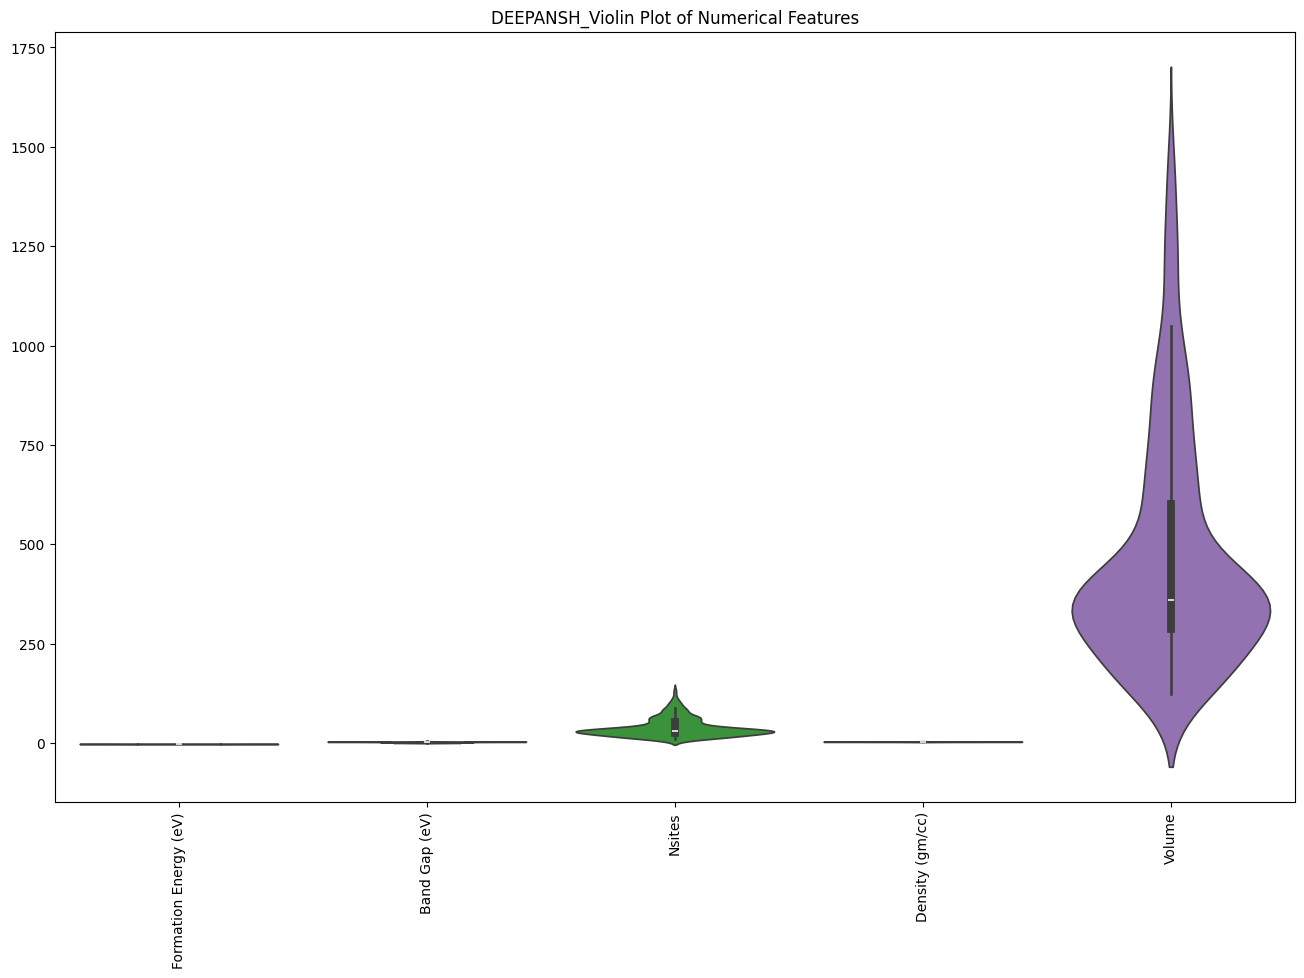

In [28]:
# Violin Plot for Numerical Data
plt.figure(figsize=(16, 10))
sns.violinplot(data=df.select_dtypes(include=[np.number]))
plt.xticks(rotation=90)
plt.title("DEEPANSH_Violin Plot of Numerical Features")
plt.show()

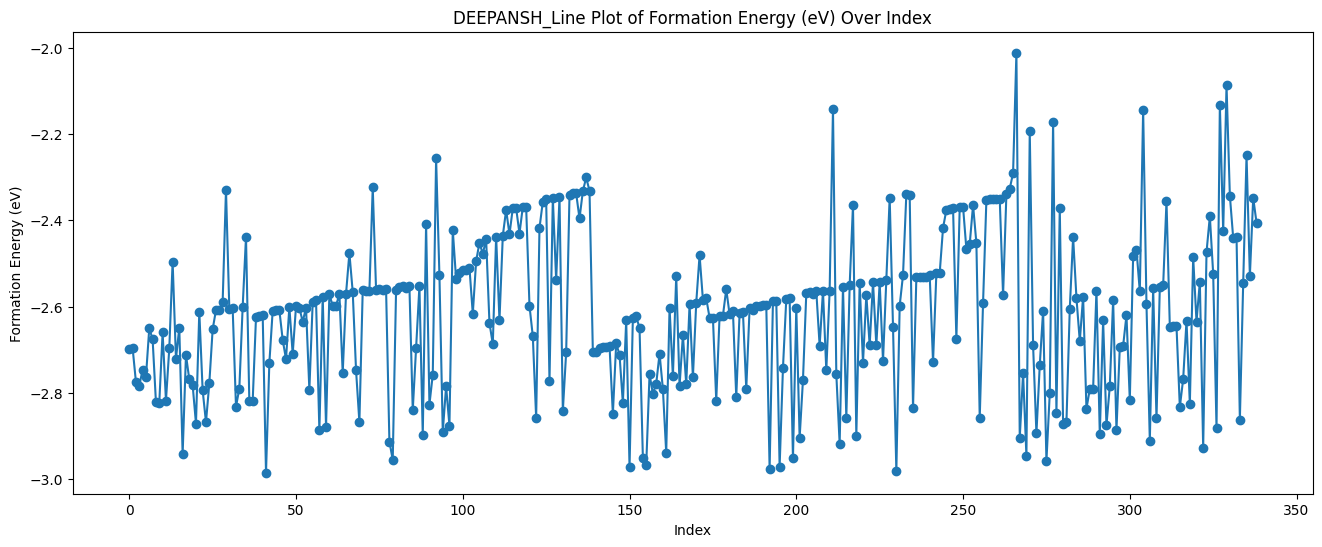

In [29]:
# Line Plot for Trends (First Numeric Column vs Index)
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 0:
    plt.figure(figsize=(16, 6))
    plt.plot(df.index, df[numeric_cols[0]], marker='o', linestyle='-')
    plt.xlabel("Index")
    plt.ylabel(numeric_cols[0])
    plt.title(f"DEEPANSH_Line Plot of {numeric_cols[0]} Over Index")
    plt.show()

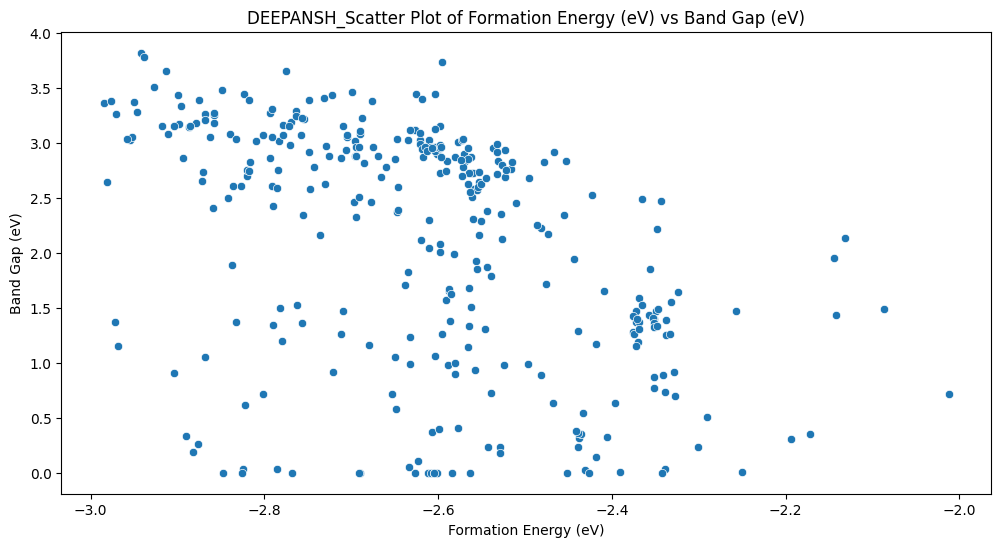

In [30]:
# Scatter Plot to Analyze Relationships
if len(numeric_cols) > 1:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=df[numeric_cols[0]], y=df[numeric_cols[1]])
    plt.xlabel(numeric_cols[0])
    plt.ylabel(numeric_cols[1])
    plt.title(f"DEEPANSH_Scatter Plot of {numeric_cols[0]} vs {numeric_cols[1]}")
    plt.show()